# Etude de faisabilité moteur de classification partie image approche CNN transfert learning

# Importation librairies primaires

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
conda list python

# packages in environment at C:\Users\ARMAN\anaconda3\envs\projet_6_OC:
#
# Name                    Version                   Build  Channel
brotli-python             1.0.9            py38hd77b12b_7  
google-api-python-client  2.108.0                  pypi_0    pypi
ipython                   8.12.2           py38haa95532_0  
ipython_genutils          0.2.0              pyhd3eb1b0_1  
opencv-python-headless    4.8.1.78                 pypi_0    pypi
python                    3.8.18               h1aa4202_0  
python-dateutil           2.8.2              pyhd3eb1b0_0  
python-fastjsonschema     2.16.2           py38haa95532_0  
python-json-logger        2.0.7            py38haa95532_0  
python-slugify            8.0.1                    pypi_0    pypi

Note: you may need to restart the kernel to use updated packages.


In [4]:
# on agrandit la fenretre de lecture
pd.set_option("display.max_rows", 250)
pd.set_option("display.max_columns", 250)
pd.set_option("display.max_colwidth", 250)

# 1) Importation du fichier

In [5]:
# importation dataframe
df = pd.read_csv("flipkart_com-ecommerce_sample_1050.csv")

In [6]:
# 5 premières données
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This...",No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value""=>""Door""}, {""key""=>""Type"", ""value""=>""Eyelet""}, {""key""=>""Model Name"", ""value""=>""Abstract Polyester Door Curtain Set Of 2""}, {""key""=>""Model ID"", ""value..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal ...",No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""key""=>""Design"", ""value""=>""Self Design""}, {""key""=>""Brand"", ""value""=>""Sathiyas""}, {""key""=>""Type"", ""value""=>""Bath Towel""}, {""key""=>""GSM..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels ...",No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"", ""value""=>""Cotton Terry""}, {""key""=>""Design"", ""value""=>""SHUVAM""}, {""key""=>""Brand"", ""value""=>""Eurospa""}, {""key""=>""GSM"", ""value""=>""360""}, {""key""=>""Type"", ""value""=>""Face Towel Set""}, {""key""=>""Model Name"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-cotton-printed-king-sized-double-bedsheet/p/itmejt9uaqahahuf?pid=BDSEJT9UQWHDUBH4,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,"[""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...""]",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,"Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet Perfact for Wedding & Gifting,Specifications of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet (1 Bedsheet,2 Pillow Cover, Multicolor)...",No rating available,No rating available,SANTOSH ROYAL 

In [7]:
# 5 dernières données
df.tail()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-large-self-adhesive-sticker/p/itme88zgzgcvtbpx?pid=STIE88ZGTX65GH4V,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Oren Empower Stickers""]",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker (Pack of 2)\r\n Price: Rs. 999\r\n\t\t\t\t\r\n\t\t\tDouble sticker can be used for the big walls. Two pieces is there that can be arranged alternatively or reflectively. This ...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 2""}, {""key""=>""Sales Package"", ""value""=>""Sheet Containing Set of Small Stickers""}, {""key""=>""Ideal Use"", ""value""=>""Any place where there is need of ample de..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl-sticker/p/itmec889fxheshyg?pid=STIEC889ZD5GDCVQ,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers""]",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,"Wallmantra Large Vinyl Sticker Sticker (Pack of 1)\r\n Price: Rs. 1,896\r\n\t\t\t\t\r\n\t\t\tBring home this exclusive Piece of Wall Art to give your home a refreshing look it deserves !\r\nWall Decals are the latest trend...",No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 1""}, {""key""=>""Sales Package"", ""value""=>""1 Wall Decal/Sticker, 1 Practice Decal, Instructions""}, {""key""=>""Ideal Use"", ""value""=>""Child Bedroom, Bedroom, Liv..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-pigmented-polyvinyl-films-imported-sticker/p/itme5uvggyhfrd4p?pid=STIE5UVGW2JWVWCT,Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers""]",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker for Rs.1449 online. Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replac...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 1""}, {""key""=>""Sales Package"", ""value""=>""Sticker""}, {""key""=>""Brand"", ""value""=>""Uberlyfe""}, {""key""=>""Type"", ""value""=>""Pigmented Polyvinyl Films (Imported)""}..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-vinyl-sticker/p/itmec889gxdsfhzb?pid=STIEC889ZGFD3RCE,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers""]",STIEC889ZGFD3RCE,3465.0,1333.0,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,False,Buy Wallmantra Medium Vinyl Sticker Sticker for Rs.1333 online. Wallmantra Medium Vinyl Sticker Sticker at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee.,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 1""}, {""key""=>""Sales Package"", ""value""=>""1 Wall Decal/Sticker, 1 Practice Decal, Instructions""}, {""key""=>""Ideal Use"", ""value""=>""Child Bedroom, Bedroom, Liv..."
1049,f2f027ad6a6df617c9f125173da71e44,2015-12-01 10:15:43 +0000,http://www.flipkart.com/

In [8]:
# lignes aléatoires
df.sample(10)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
52,f01140c02fd09e5c56312a64fa8db3da,2016-05-30 10:52:06 +0000,http://www.flipkart.com/cookart-elegant-s-s-handi-hot-pot-pack-4-casserole-set/p/itmej6b7ewvuveht?pid=CRLEJ6B76SJP8ZVG,Cookart Elegant S.S. Handi With Hot Pot Pack of 4 Casserole Set,"[""Kitchen & Dining >> Cookware >> Casserole & Sets >> Cookart Casserole & Sets >> Cookart Elegant S.S. Handi With Hot Pot Pack of ...""]",CRLEJ6B76SJP8ZVG,945.0,699.0,f01140c02fd09e5c56312a64fa8db3da.jpg,False,"Key Features of Cookart Elegant S.S. Handi With Hot Pot Pack of 4 Casserole Set Pack of 4 Cook and Serve Casserole,Cookart Elegant S.S. Handi With Hot Pot Pack of 4 Casserole Set (1500 ml, 2.25 L) Price: Rs. 699 Cookart introduces a perfect fusio...",No rating available,No rating available,Cookart,"{""product_specification""=>[{""key""=>""Microwave Safe"", ""value""=>""No""}, {""key""=>""Brand"", ""value""=>""Cookart""}, {""key""=>""Casserole Type"", ""value""=>""Cook and Serve Casserole""}, {""key""=>""Model Number"", ""value""=>""ECH1""}, {""key""=>""Type"", ""value""=>""Cassero..."
108,5aacf8f5154afea2ac22fc767d072677,2016-01-01 10:55:30 +0000,http://www.flipkart.com/rama-floral-single-quilts-comforters-blue-beige/p/itmee6ktgusgjhpf?pid=BLAEE6KTUAEBTDKS,Rama Floral Single Quilts & Comforters Blue-Beige,"[""Home Furnishing >> Bed Linen >> Blankets, Quilts & Dohars""]",BLAEE6KTUAEBTDKS,1499.0,749.0,5aacf8f5154afea2ac22fc767d072677.jpg,False,Buy Rama Floral Single Quilts & Comforters Blue-Beige at Rs. 749 at Flipkart.com. Only Genuine Products. Free Shipping. Cash On Delivery!,No rating available,No rating available,Rama,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Rama""}, {""key""=>""Type"", ""value""=>""Quilts and Comforters""}, {""key""=>""Hand Washable"", ""value""=>""Yes""}, {""key""=>""Model ID"", ""value""=>""Floral Jaipuri Printed Quilt""}, {""key""=>""Character"", ""value""=..."
496,087e83a2406dc98d941b8555356da477,2016-01-07 05:50:25 +0000,http://www.flipkart.com/sonata-7016ym04-watch/p/itmdz2zshwz6enyj?pid=WATDZ2ZQE9C7GQVK,Sonata 7016YM04 Watch,"[""Watches >> Wrist Watches >> Sonata Wrist Watches""]",WATDZ2ZQE9C7GQVK,840.0,789.0,087e83a2406dc98d941b8555356da477.jpg,False,"Sonata 7016YM04 Watch - Buy Sonata 7016YM04 Watch 7016YM04 Online at Rs.789 in India Only at Flipkart.com. - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!",No rating available,No rating available,NaN,"{""product_specification""=>{""key""=>""Style Code"", ""value""=>""7016YM04""}}"
214,9d279c825ba12804c337f883b366a6e2,2015-12-01 12:40:44 +0000,http://www.flipkart.com/shoppingtara-paper-mache-3-piece-elephant-home-decor-gift-showpiece-4-cm/p/itme7dfnpgvpyxbh?pid=SHIE7DFN7FEZEQJE,Shoppingtara Paper Mache 3 Piece Elephant Home Decor Gift Showpiece - 4 cm,"[""Home Decor & Festive Needs >> Showpieces >> Shoppingtara Showpieces""]",SHIE7DFN7FEZEQJE,1520.0,489.0,9d279c825ba12804c337f883b366a6e2.jpg,False,"Shoppingtara Paper Mache 3 Piece Elephant Home Decor Gift Showpiece - 4 cm (Paper Mache, Multicolor)\r\n Price: Rs. 489\r\n\t\t\t\t\r\n\t\t\tThis handcrafted elephant is a set of 3 piece elephants made of Chinese Paper M...",No rating available,No rating available,Shoppingtara,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Shoppingtara""}, {""key""=>""Model Number"", ""value""=>""jo-9625-19""}, {""key""=>""Type"", ""value""=>""Ethnic""}, {""key""=>""Material"", ""value""=>""Paper Mache""}, {""key""=>""Model Name"", ""value""=>""Paper Mache 3 P..."
1031,7d2883d833e215d3092c7f53572f870d,2016-03-03 06:06:42 +0000,http://www.flipkart.com/kerastase-nutritive-bain-satin-1-complete-nutrition-shampoo/p/itmdjvmdhhxfzgff?pid=SMPDJVMAKKNB69AY,Kerastase Nutritive Bain Satin 1 Complete Nutrition Shampoo,"[""Beauty and Perso

In [9]:
# info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [10]:
# valeures uniques
df.nunique()

uniq_id                    1050
crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

In [11]:
# valeurs nulles
df.isnull().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [12]:
# valeures nulles
df.isnull().mean()

uniq_id                    0.000000
crawl_timestamp            0.000000
product_url                0.000000
product_name               0.000000
product_category_tree      0.000000
pid                        0.000000
retail_price               0.000952
discounted_price           0.000952
image                      0.000000
is_FK_Advantage_product    0.000000
description                0.000000
product_rating             0.000000
overall_rating             0.000000
brand                      0.321905
product_specifications     0.000952
dtype: float64

In [13]:
# Lignes dupliquées
df.duplicated().sum()

0

In [14]:
# check colonne 
df['product_rating'].value_counts()

No rating available    889
5                       43
4                       21
3                       12
1                       10
4.5                     10
4.3                      9
3.7                      8
3.5                      8
2                        6
4.1                      4
4.2                      4
3.8                      3
4.4                      3
4.7                      3
2.3                      3
3.6                      3
4.8                      2
2.5                      1
3.2                      1
2.2                      1
4.9                      1
3.3                      1
3.9                      1
3.1                      1
2.7                      1
1.5                      1
Name: product_rating, dtype: int64

In [15]:
# check colonne 
df['overall_rating'].value_counts()

No rating available    889
5                       43
4                       21
3                       12
1                       10
4.5                     10
4.3                      9
3.7                      8
3.5                      8
2                        6
4.1                      4
4.2                      4
3.8                      3
4.4                      3
4.7                      3
2.3                      3
3.6                      3
4.8                      2
2.5                      1
3.2                      1
2.2                      1
4.9                      1
3.3                      1
3.9                      1
3.1                      1
2.7                      1
1.5                      1
Name: overall_rating, dtype: int64

In [16]:
# check colonne 
df['is_FK_Advantage_product'].value_counts()

False    993
True      57
Name: is_FK_Advantage_product, dtype: int64

In [17]:
# check colonne 
df['brand'].value_counts()

PRINT SHAPES          11
Lapguard              11
Lal Haveli            10
Raymond                8
Aroma Comfort          8
                      ..
Rute                   1
NAMS                   1
JewelKraft Designs     1
Budding Bees           1
Zero                   1
Name: brand, Length: 490, dtype: int64

In [18]:
# check colonne 
df[["description", "product_specifications"]]

,description,product_specifications
0,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This...","{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value""=>""Door""}, {""key""=>""Type"", ""value""=>""Eyelet""}, {""key""=>""Model Name"", ""value""=>""Abstract Polyester Door Curtain Set Of 2""}, {""key""=>""Model ID"", ""value..."
1,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal ...","{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""key""=>""Design"", ""value""=>""Self Design""}, {""key""=>""Brand"", ""value""=>""Sathiyas""}, {""key""=>""Type"", ""value""=>""Bath Towel""}, {""key""=>""GSM..."
2,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels ...","{""product_specification""=>[{""key""=>""Material"", ""value""=>""Cotton Terry""}, {""key""=>""Design"", ""value""=>""SHUVAM""}, {""key""=>""Brand"", ""value""=>""Eurospa""}, {""key""=>""GSM"", ""value""=>""360""}, {""key""=>""Type"", ""value""=>""Face Towel Set""}, {""key""=>""Model Name"",..."
3,"Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet Perfact for Wedding & Gifting,Specifications of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet (1 Bedsheet,2 Pillow Cover, Multicolor)...","{""product_specification""=>[{""key""=>""Brand"", ""value""=>""SANTOSH ROYAL FASHION""}, {""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Type"", ""value""=>""Flat""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""key""=>""Model Name"", ""value""=>""Gold Design Roya..."
4,"Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print Cotton Floral King sized Double Bedsheet (1 bed sheet 2 pillow cover, White) Price: Rs. 998 This nice bed sheet made up of 100% cotton to give you comf...","{""product_specification""=>[{""key""=>""Machine Washable"", ""value""=>""Yes""}, {""key""=>""Brand"", ""value""=>""Jaipur Print""}, {""key""=>""Type"", ""value""=>""Flat""}, {""key""=>""Model Name"", ""value""=>""jaipur117""}, {""key""=>""Material"", ""value""=>""Cotton""}, {""key""=>""Thr..."
...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker (Pack of 2)\r\n Price: Rs. 999\r\n\t\t\t\t\r\n\t\t\tDouble sticker can be used for the big walls. Two pieces is there that can be arranged alternatively or reflectively. This ...,"{""product_specification""=>[{""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 2""}, {""key""=>""Sales Package"", ""value""=>""Sheet Containing Set of Small Stickers""}, {""key""=>""Ideal Use"", ""value""=>""Any place where there is need of ample de..."
1046,"Wallmantra Large Vinyl Sticker Sticker (Pack of 1)\r\n Price: Rs. 1,896\r\n\t\t\t\t\r\n\t\t\tBring home this exclusive Piece of Wall Art to give your home a refreshing look it deserves !\r\nWall Decals are the latest trend...","{""product_specification""=>[{""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 1""}, {""key""=>""Sales Package"", ""value""=>""1 Wall Decal/Sticker, 1 Practice Decal, Instructions""}, {""key""=>""Ideal Use"", ""value""=>""Child Bedroom, Bedroom, Liv..."
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker for Rs.1449 online. Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker at best prices with FREE sh

In [19]:
# check colonne 
df['product_specifications'][0]

'{"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"}, {"key"=>"Designed For", "value"=>"Door"}, {"key"=>"Type", "value"=>"Eyelet"}, {"key"=>"Model Name", "value"=>"Abstract Polyester Door Curtain Set Of 2"}, {"key"=>"Model ID", "value"=>"Duster25"}, {"key"=>"Color", "value"=>"Multicolor"}, {"key"=>"Length", "value"=>"213 cm"}, {"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 2"}, {"key"=>"Sales Package", "value"=>"2 Curtains"}, {"key"=>"Material", "value"=>"Polyester"}]}'

In [20]:
df['product_category_tree'][0]

'["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

In [21]:
# Séléction des colonnes pertinentes
df = df[['product_name','image','product_category_tree']]

In [22]:
df

,product_name,image,product_category_tree
0,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]"
1,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]"
2,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]"
3,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,d4684dcdc759dd9cdf41504698d737d8.jpg,"[""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...""]"
4,Jaipur Print Cotton Floral King sized Double Bedsheet,6325b6870c54cd47be6ebfbffa620ec7.jpg,"[""Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed...""]"
...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,958f54f4c46b53c8a0a9b8167d9140bc.jpg,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Oren Empower Stickers""]"
1046,Wallmantra Large Vinyl Sticker Sticker,fd6cbcc22efb6b761bd564c28928483c.jpg,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers""]"
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker,5912e037d12774bb73a2048f35a00009.jpg,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers""]"
1048,Wallmantra Medium Vinyl Sticker Sticker,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,"[""Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers""]"


In [23]:
# check à nouveau valeur nulles
df.isnull().sum()

product_name             0
image                    0
product_category_tree    0
dtype: int64

# 2) Exploration Data Analyze

In [24]:
import sklearn

In [25]:
import re
import nltk
from sklearn.preprocessing import LabelEncoder

In [26]:
df.head()

,product_name,image,product_category_tree
0,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]"
1,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y...""]"
2,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,"[""Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA...""]"
3,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,d4684dcdc759dd9cdf41504698d737d8.jpg,"[""Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ...""]"
4,Jaipur Print Cotton Floral King sized Double Bedsheet,6325b6870c54cd47be6ebfbffa620ec7.jpg,"[""Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed...""]"


In [27]:
# Extraction des catégories
# Suppression caractères ">>"
df['product_category_tree'] = df['product_category_tree'].apply(lambda x : x.split(">>"))
# Sélèction de la première valeur
df['product_category_tree'] = df['product_category_tree'].apply(lambda x : x[0])
# Supression catactères inutiles
df['product_category_tree'] = df['product_category_tree'].apply(lambda x : re.sub("[\"\[]","",x))

In [28]:
# Comptage
df['product_category_tree'].value_counts()

Home Furnishing                150
Baby Care                      150
Watches                        150
Home Decor & Festive Needs     150
Kitchen & Dining               150
Beauty and Personal Care       150
Computers                      150
Name: product_category_tree, dtype: int64

In [29]:
# check valeurs nulles
df.isnull().sum()

product_name             0
image                    0
product_category_tree    0
dtype: int64

In [30]:
# lignes dupliquées
df["image"].duplicated().sum()

0

In [31]:
df

,product_name,image,product_category_tree
0,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing
1,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care
2,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care
3,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing
4,Jaipur Print Cotton Floral King sized Double Bedsheet,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing
...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Baby Care
1046,Wallmantra Large Vinyl Sticker Sticker,fd6cbcc22efb6b761bd564c28928483c.jpg,Baby Care
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker,5912e037d12774bb73a2048f35a00009.jpg,Baby Care
1048,Wallmantra Medium Vinyl Sticker Sticker,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Baby Care


In [32]:
# encodage des catégories avec label encoder

le = LabelEncoder()
df["label_categories"] = le.fit_transform(df["product_category_tree"])
df.head()

,product_name,image,product_category_tree,label_categories
0,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,4
1,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,0
3,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,4
4,Jaipur Print Cotton Floral King sized Double Bedsheet,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,4


In [33]:
# importation os et lien vers le fichier image
import os
path = "C:/Users/ARMAN/OneDrive/Bureau/DATASCIENCE/9-OPEN CLASSROOMS/Projet 6-Classifiez automatiquement des biens de consommation/Images/"

In [34]:
# liste des images
list_photos_im = [file for file in os.listdir(path)]
print(len(list_photos_im))

1050


In [35]:
# importation bibliothèque image
from matplotlib.image import imread

In [36]:
# fonction de listing et affichage des images

def list_image(category,nb_images,show = True):
    df_temp = df[df["product_category_tree"]==category]
    list_image = df_temp["image"].to_list()
    if show == True :
        print(f"- {category}:")
        for i in np.arange(0,nb_images,1) :
            plt.rcParams["figure.figsize"] = [8,16]
            plt.subplot(1,nb_images,i+1)
            plt.imshow(imread(path + list_image[i]))
            plt.tight_layout()
        plt.show()
    else : return list_image

- Home Furnishing :


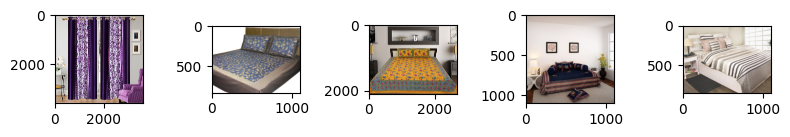

- Baby Care :


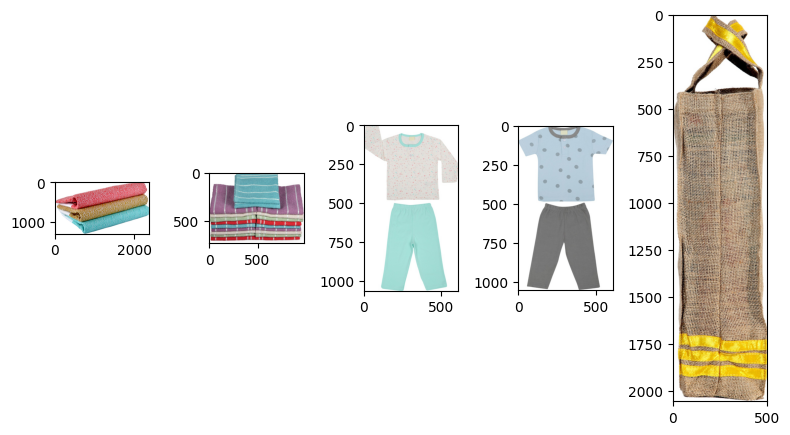

- Watches :


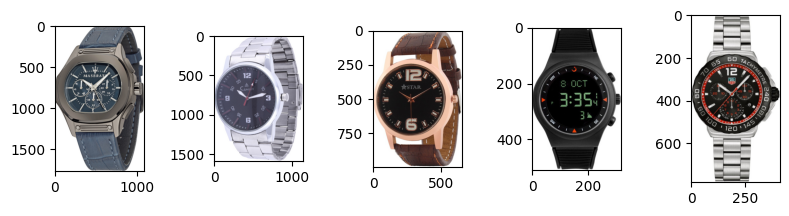

- Home Decor & Festive Needs :


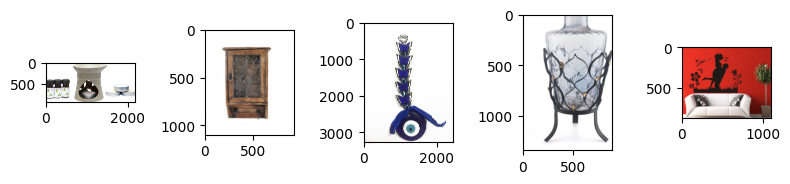

- Kitchen & Dining :


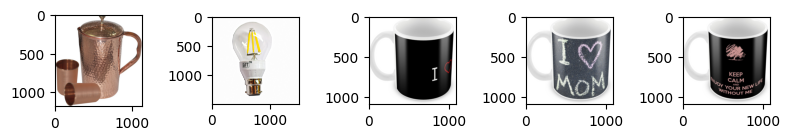

- Beauty and Personal Care :


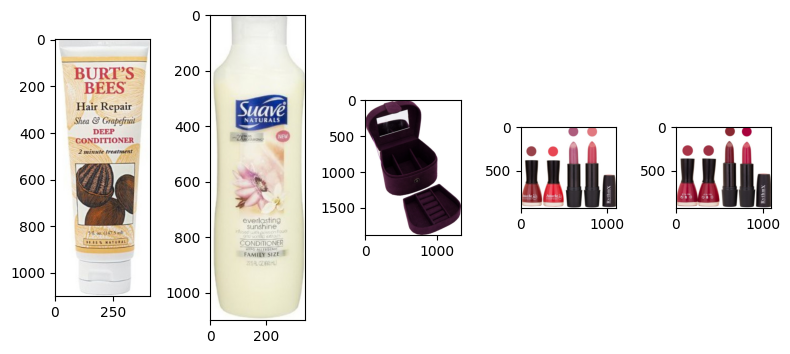

- Computers :


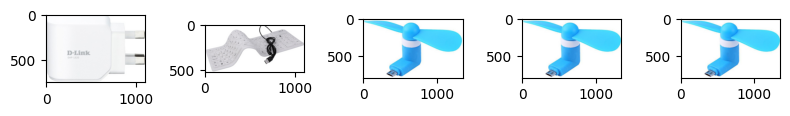

In [37]:
# Affichage des images par catégories
for categorty in df["product_category_tree"].unique() : 
    list_image(categorty, 5, show = True)

In [38]:
df["product_category_tree"].unique()[0]

'Home Furnishing '

In [39]:
# Affichage des images par catégories
list_image(df["product_category_tree"].unique()[0],0,show = False)[0]

'55b85ea15a1536d46b7190ad6fff8ce7.jpg'

# 3) Modélisation transfer learning CNN

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout 
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

## 3.1) Création du modèle pré-entrainé

In [41]:
# création du modèle
base_model = VGG16()
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## 3.2) Création des features des images

In [43]:
# Features images

images_features = []
T0 = time.time()
for img in df["image"]:
    # Sélection de l'image
    image = load_img(path+img, target_size=(224,224))
    # conversion en array                  
    image = img_to_array(image)                 
    # ajout d'un axe
    image = np.expand_dims(image, axis=0)
    # préparation pour entrée CNN
    image = preprocess_input(image)
    # Prédiction du modèle préentrainé
    images_features.append(model.predict(image, verbose=0)[0])
duration = time.time()-T0
print(f" temps de traitement {duration} secondes")

C:\Users\ARMAN\anaconda3\envs\projet_6_OC\lib\site-packages\PIL\Image.py:3182: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 temps de traitement 213.01352286338806 secondes


## 3.3) Réduction dimension

### 3.3.1) PCA

In [45]:
from sklearn.decomposition import PCA

In [46]:
# réduction pca
pca = PCA(n_components=0.99)
feat_pca = pca.fit_transform(images_features)

In [47]:
# check réduction
feat_pca.shape

(1050, 803)

### 3.3.2) TSNE

In [48]:
from sklearn.manifold import TSNE

In [49]:
# Mise en place TSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

In [50]:
# dataframe
df_tsne = pd.DataFrame(X_tsne, columns = ["tsne1", "tsne2"])
df_tsne["product_category_tree"] = df["product_category_tree"]
df_tsne["label_categories"] = df["label_categories"]
df_tsne

,tsne1,tsne2,product_category_tree,label_categories
0,20.468122,-25.380470,Home Furnishing,4
1,0.542421,-21.404812,Baby Care,0
2,-5.367891,-21.888453,Baby Care,0
3,11.744109,-29.847248,Home Furnishing,4
4,21.014563,-32.041958,Home Furnishing,4
...,...,...,...,...
1045,19.314213,-25.482376,Baby Care,0
1046,6.256766,-6.580826,Baby Care,0
1047,8.041542,-6.570453,Baby Care,0
1048,6.585341,-7.566060,Baby Care,0


### 3.3.3) Classification selon vraies catégories

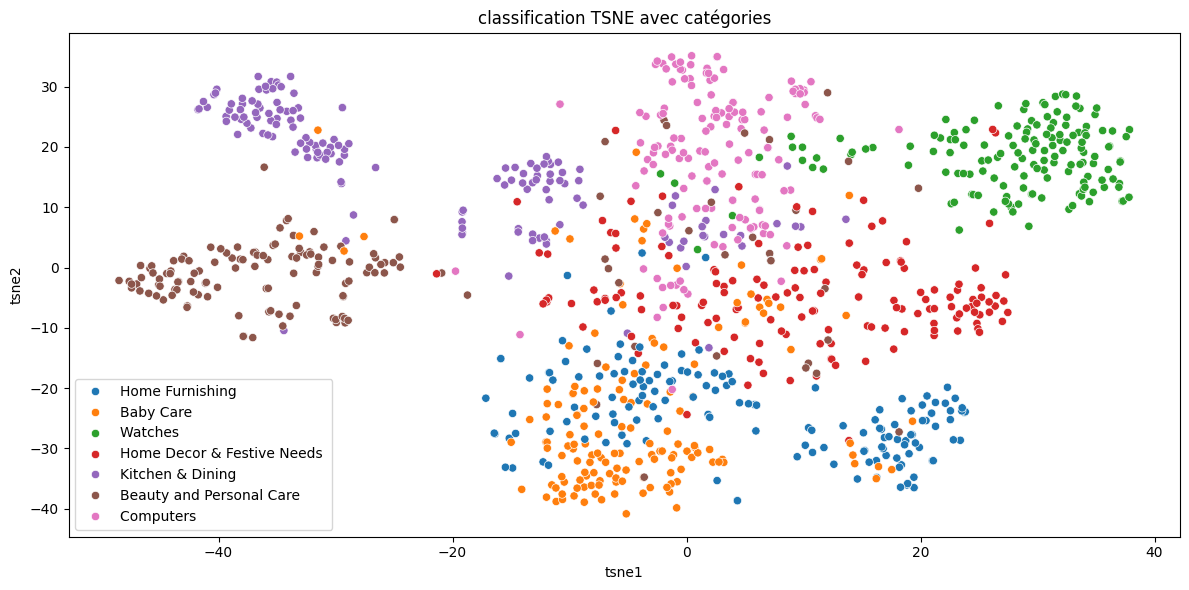

In [51]:
# Classification selon vraies catégories
plt.rcParams["figure.figsize"] = [12,6]
sns.scatterplot(data = df_tsne, x = "tsne1", y = "tsne2", hue = "product_category_tree",
                palette=sns.color_palette('tab10', n_colors=7))
plt.title("classification TSNE avec catégories")
plt.xlabel("tsne1")
plt.ylabel("tsne2")
plt.legend()
plt.tight_layout()
plt.show()

### 3.3.4) Classification selon KMEANS

In [52]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [53]:
# mise en place du Kmeans
kmeans = KMeans(n_clusters = 7, n_init = 100, random_state = 0)
kmeans.fit(df_tsne[["tsne1","tsne2"]])

KMeans(n_clusters=7, n_init=100, random_state=0)

In [54]:
# Ajout des lables
df_tsne["clusters"] = kmeans.labels_

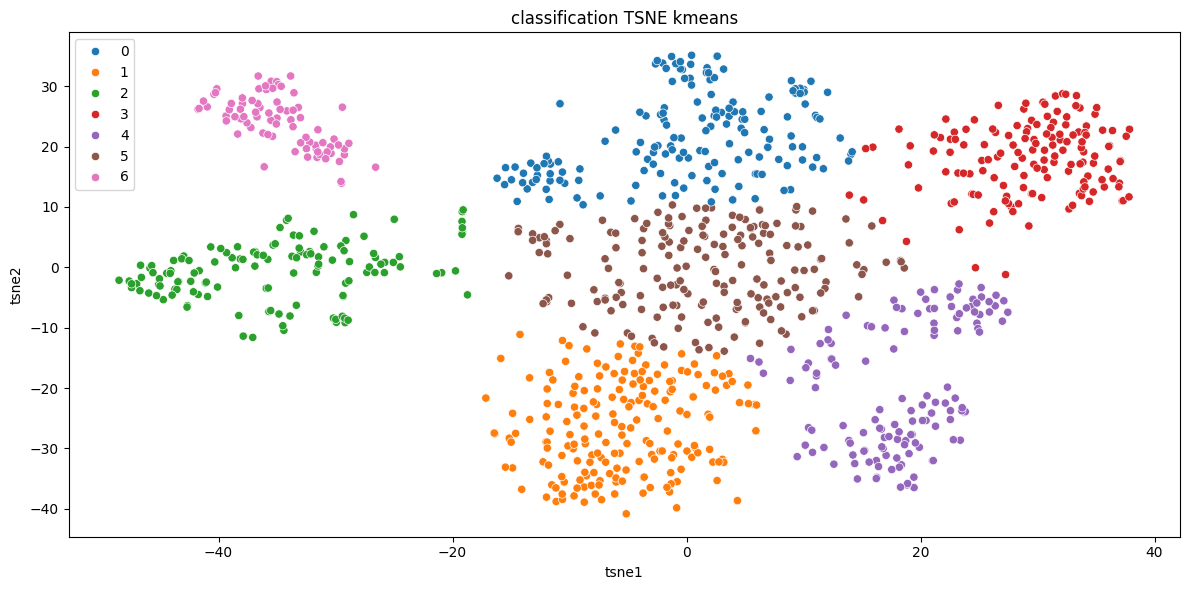

In [55]:
# Classification selon kmeans catégories
plt.rcParams["figure.figsize"] = [12,6]
sns.scatterplot(data = df_tsne, x = "tsne1", y = "tsne2", hue = "clusters",
               palette=sns.color_palette('tab10', n_colors=7))
plt.title("classification TSNE kmeans")
plt.xlabel("tsne1")
plt.ylabel("tsne2")
plt.legend()
plt.tight_layout()
plt.show()

In [56]:
# Mesure ARI
ARI = metrics.adjusted_rand_score(df_tsne["label_categories"], df_tsne["clusters"])
ARI

0.44929526694083255